# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


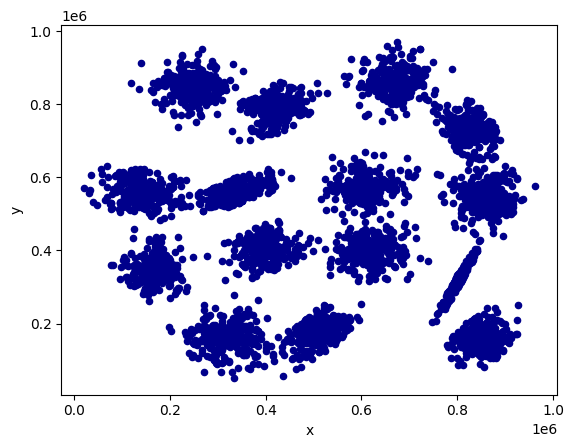

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

best_score = -1  # Inisialisasi dengan nilai silhouette score terendah
best_n_clusters = 2  # Jumlah cluster terbaik awal

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

for n_clusters in range(2, 100):  # Coba jumlah cluster dari 2 hingga 100
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(data)
    score = silhouette_score(data, labels)

    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
        best_labels = labels

print("Jumlah cluster terbaik:", best_n_clusters)
print("Silhouette score terbaik:", best_score)

Jumlah cluster terbaik: 15
Silhouette score terbaik: 0.7085450839314958


## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

result = data.copy()
result['cluster'] = best_labels
result.head()
#END CODE

,x,y,cluster
0,664159,550946,12
1,665845,557965,12
2,597173,575538,12
3,618600,551446,12
4,635690,608046,12


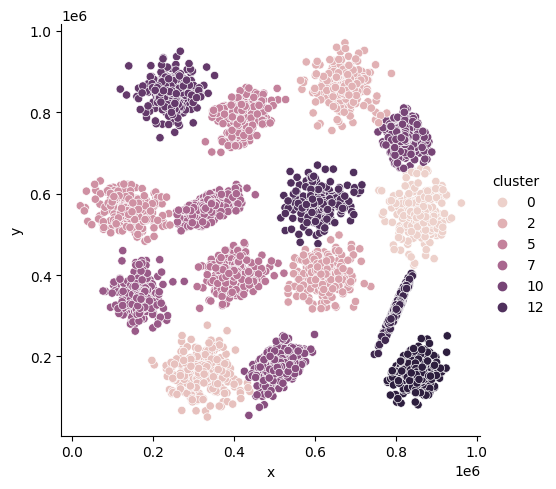

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', hue='cluster', data=result)
plt.show()
#END CODE